## Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1


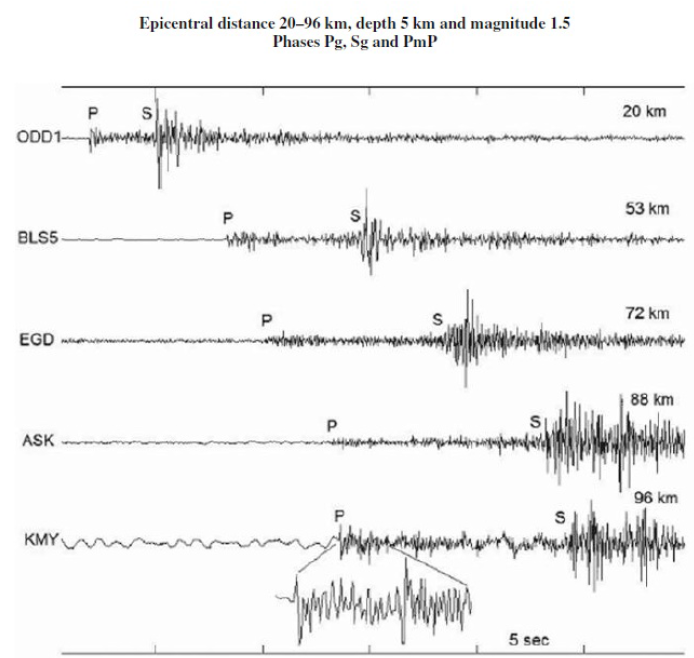

Los observatorios sismológicos clasifican las señales sísmicas de acuerdo a la diferencia de tiempo de arribo entre la onda P y la onda S, conocida como S-P. La S-P, es una indicación de la distancia que existe desde el punto donde se genera el sismo al punto donde se encuentra la estación que lo registra, es decir de la distancia epicentral. Dicho parámetro, aplicado a las señales registradas
por el OSQ permite definir tres tipos de sismos: local, caracterizado por tener una S-P menor a 20 s; regional cuya S-P varía entre 20 s y 180 s y telesismo, cuya S-P es mayor 180 s.

In [1]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc

Se descargan los archivos sismicos almacenados en el repositorio de GitHub.

In [3]:
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisLoc.mat?raw=true" -O "sisLoc.mat"
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisReg.mat?raw=true" -O "sisReg.mat"
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisTele.mat?raw=true" -O "sisTele.mat"

--2023-03-22 20:09:09--  https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisLoc.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/LuisOchoaM/MiniProyecto1_TS3/raw/main/sisLoc.mat [following]
--2023-03-22 20:09:09--  https://github.com/LuisOchoaM/MiniProyecto1_TS3/raw/main/sisLoc.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto1_TS3/main/sisLoc.mat [following]
--2023-03-22 20:09:09--  https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto1_TS3/main/sisLoc.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

Por lo tanto, se descargar los archivos desde Google Drive.

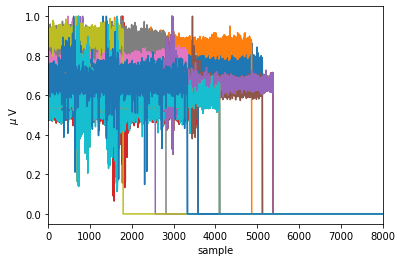

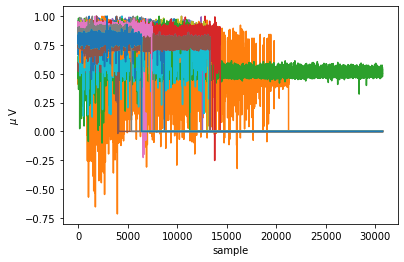

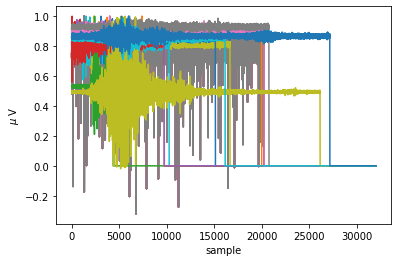

In [4]:
data_Loc = sc.loadmat('sisLoc.mat')
data_Reg = sc.loadmat('sisReg.mat')
data_Tele = sc.loadmat('sisTele.mat')

data_Loc.keys() # variables del diccionario
data_Reg .keys() # variables del diccionario
data_Tele.keys() # variables del diccionario

Y_Loc = data_Loc['Y']
fs_Loc = data_Loc['fs'][0][0]
Y_Reg = data_Reg ['Y']
fs_Reg = data_Reg ['fs'][0][0]
Y_Tele = data_Tele['Y']
fs_Tele = data_Tele['fs'][0][0]

plt.plot(Y_Loc.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.xlim(0,8000)
plt.show()

plt.plot(Y_Reg.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

plt.plot(Y_Tele.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

### Se eliminan todos los 0s que están al final de cada señal y se calcula  la media de cada una de esta, por último se le quita el nivel DC.

In [5]:
data=[]
dataLoc=[]
dataReg=[]
dataTele=[]

for i in range(21):
  data=Y_Loc[i]
  while data[-1] == 0:
     data=data[:-1]

  dataLoc.append(data-np.mean(data))
  data=Y_Reg[i]
  while data[-1] == 0:
     data=data[:-1]

  dataReg.append(data-np.mean(data))
  data=Y_Tele[i]
  while data[-1] == 0:
     data=data[:-1]

  dataTele.append(data-np.mean(data))

#Se guarda una copia de las señales para depues poder compararlas con la señal filtrada
sismo_Loc=dataLoc
sismo_Reg=dataReg  
sismo_Tele=dataTele

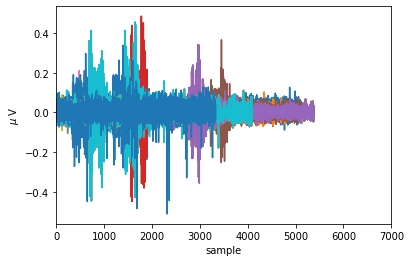

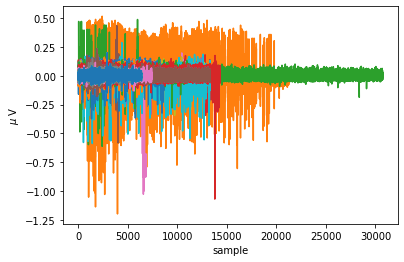

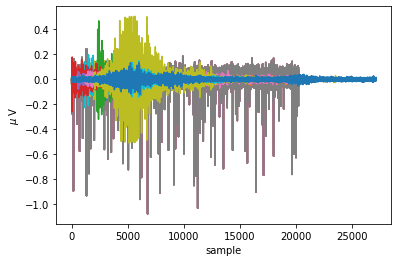

In [6]:
for i in dataLoc:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.xlim(0,7000)
plt.show()

for i in dataReg:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.show()

for i in dataTele:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.show()

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import sosfreqz
import numpy as np

In [8]:
from ipywidgets import interact

In [9]:
#Señal sin filtrar
@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = sismo_Tele[idx] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.title("Señal sismica sin filtrar")
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()

# Definir la frecuencia de muestreo y la frecuencia de corte
fs = 200 # Hz
fc_H = 50 # Hz
fc_L = 1 # Hz

#Se normalizan las frecuencias con respecto a la frecuencia de muestreo (Fs/2)
fc_H_norm = fc_H/(fs/2) # Hz
fc_L_norm = fc_L/(fs/2) # Hz

#Coeficientes del filtro SOS (Second-Order Sections)
sos = signal.butter(4, [fc_L_norm,fc_H_norm], btype='band', output='sos')

#Se filtran todas las señales sismicas.
for i in range(21):
  dataLoc[i] = signal.sosfilt(sos, dataLoc[i])
  dataReg[i] = signal.sosfilt(sos, dataReg[i])
  dataTele[i] = signal.sosfilt(sos, dataTele[i])

#Señal filtrada
@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = dataTele[idx] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.title("Señal sismica filtrada")
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()
# Calcular la respuesta en frecuencia del filtro SOS
w, h = sosfreqz(sos, worN=2000)  #worN = numero de puntos de frecuencia

# Calcular la magnitud de la respuesta en frecuencia en dB
mag = 20*np.log10(np.abs(h))

# Graficar el diagrama de magnitud
plt.plot(w/(2*np.pi)*fs, mag)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.title("Diagrama de magnitud del filtro SOS")
plt.axvline(50, color='green', label="Frec corte") # cutoff frequency
plt.axhline(y=-3, color='red', linestyle='--', label="-3 dB")
plt.legend()
plt.grid(which='both', axis='both')
plt.ylim(-100,5)
plt.show()

### Se agregan nuevamente todas las señales con el misma longitud a un array para poder realizar el Análisis de espectro singular.

In [10]:
# Encontrar la longitud máxima de las listas
longitud_maxima1 = max(len(l) for l in dataLoc)
longitud_maxima2 = max(len(l) for l in dataReg)
longitud_maxima3 = max(len(l) for l in dataTele)

# Rellenar las listas más cortass con ceros nuevamente y agregarlas a un arreglo
dataLoc_filter = np.array([np.pad(l, (0, longitud_maxima1 - len(l)), 'constant') for l in dataLoc])
dataReg_filter = np.array([np.pad(l, (0, longitud_maxima2 - len(l)), 'constant') for l in dataReg])
dataTele_filter = np.array([np.pad(l, (0, longitud_maxima3 - len(l)), 'constant') for l in dataTele])

In [11]:
# We decompose the time series into three subseries
def Analisis_Singular(X, groups):

  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=groups)
  X_ssa = ssa.fit_transform(X)

  return X_ssa

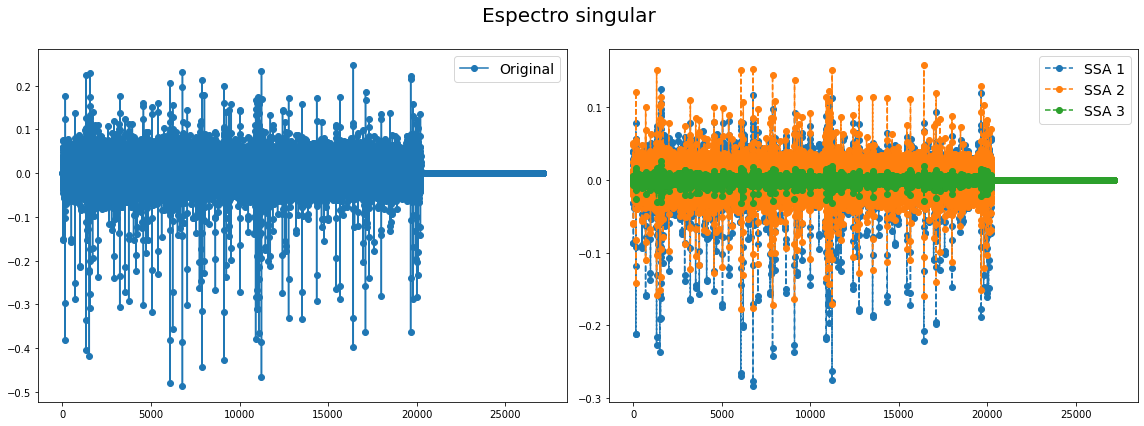

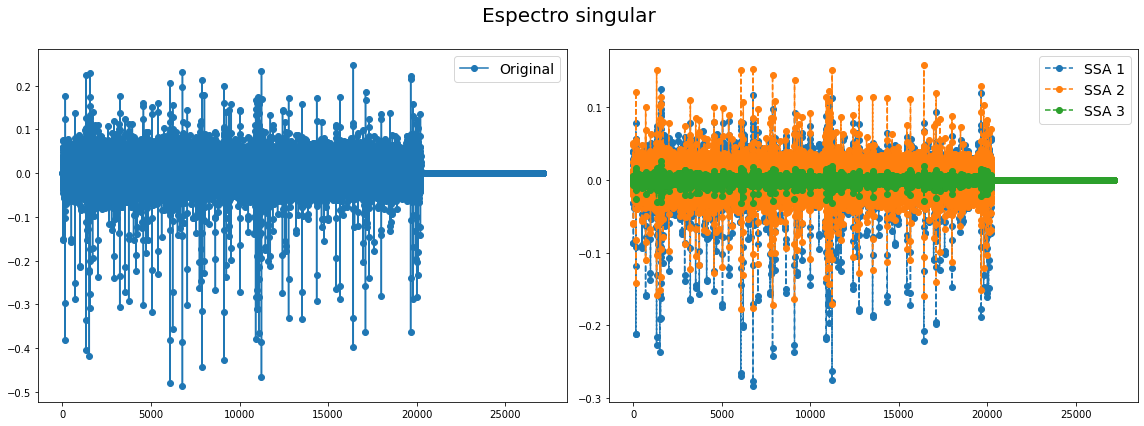

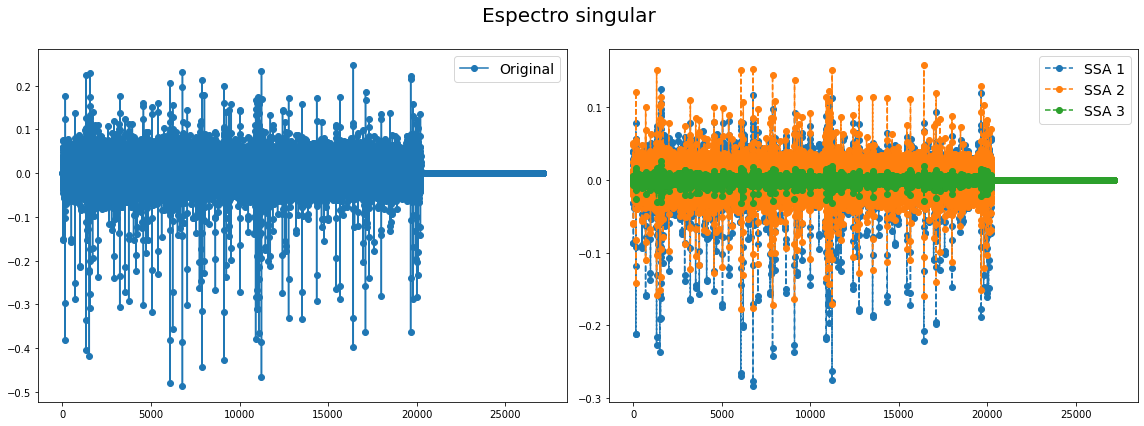

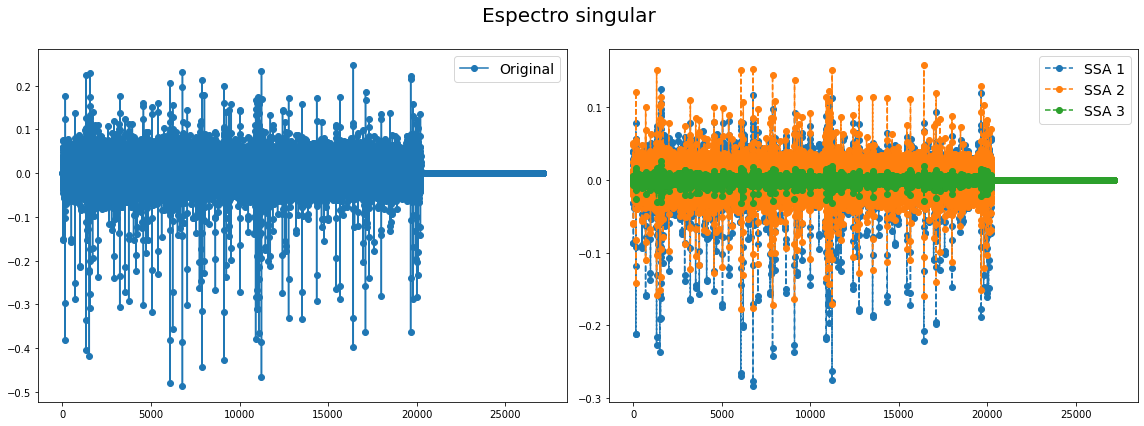

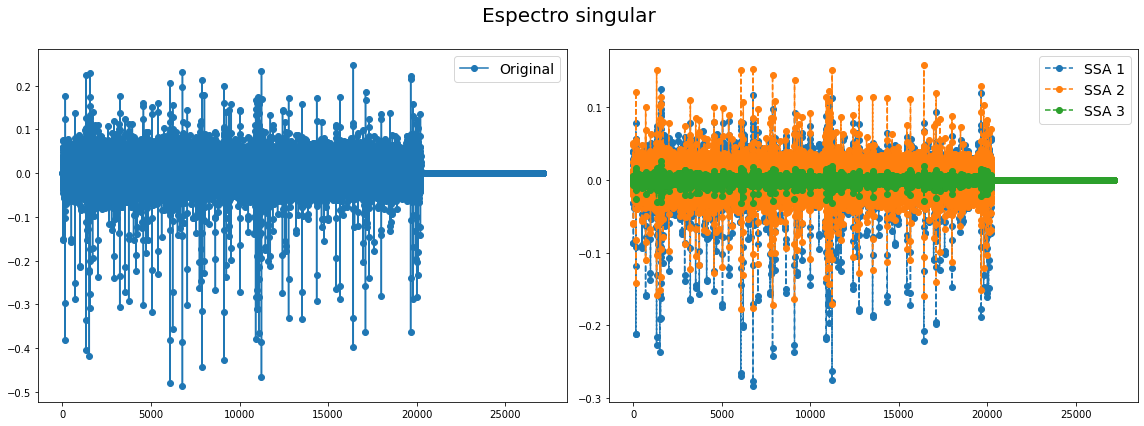

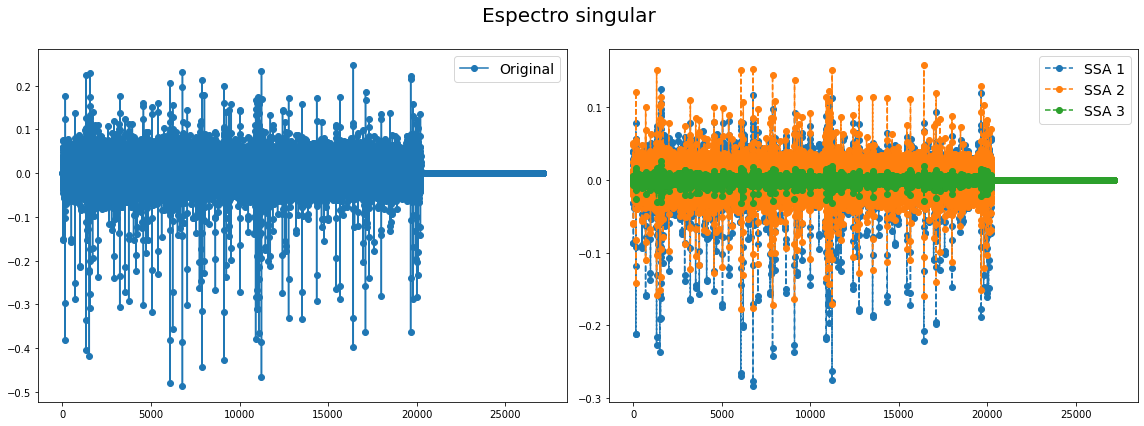

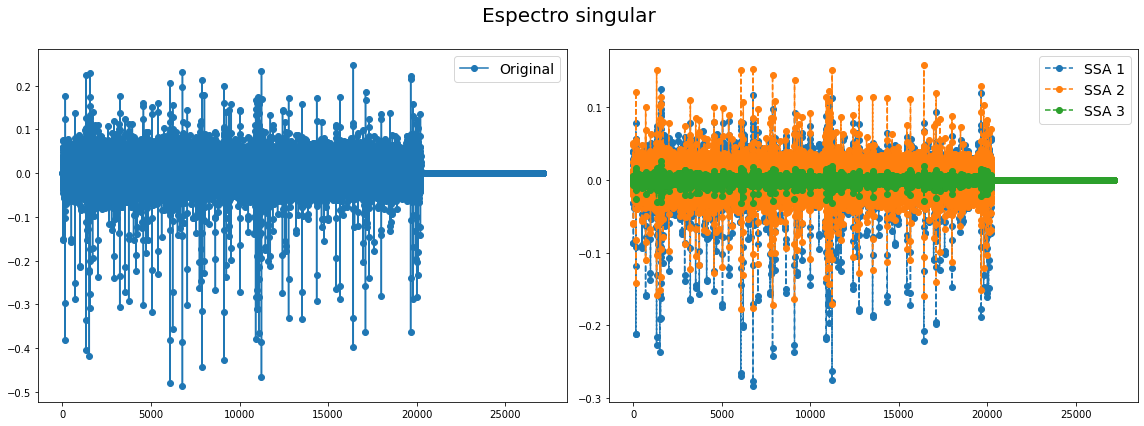

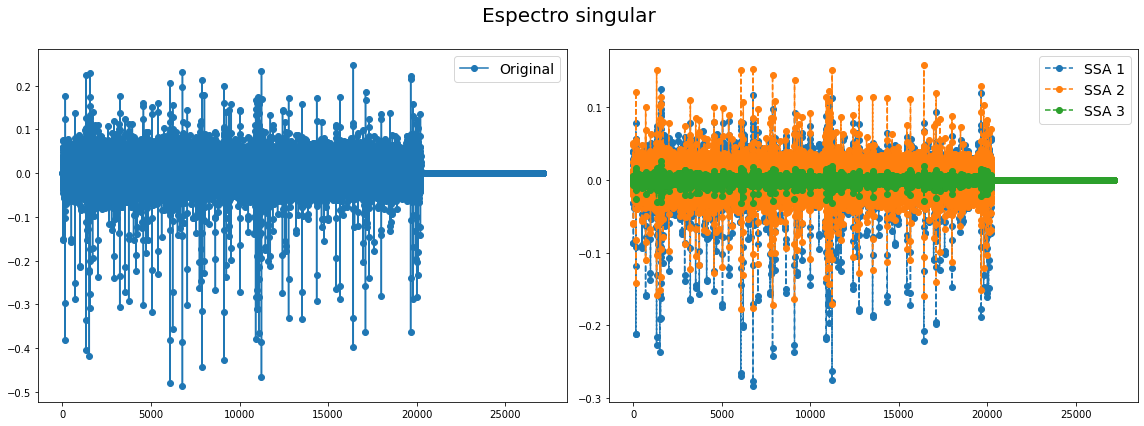

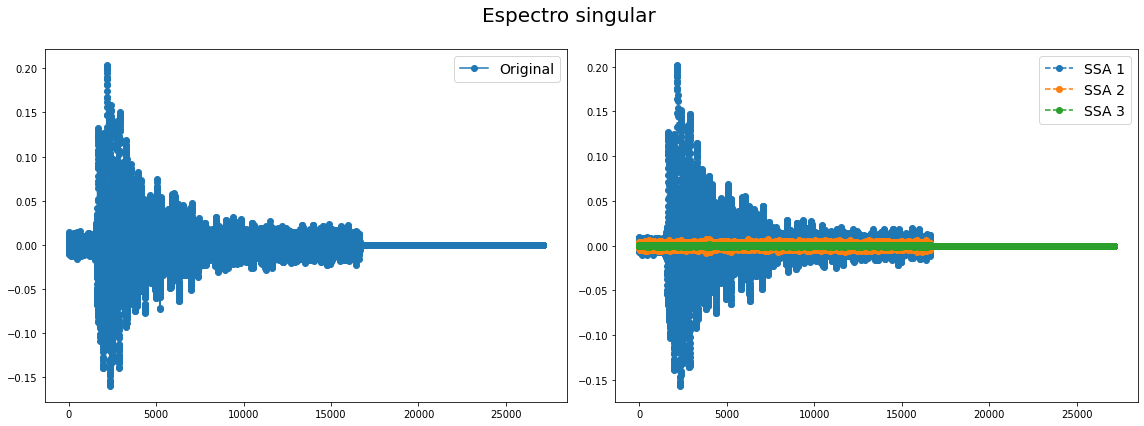

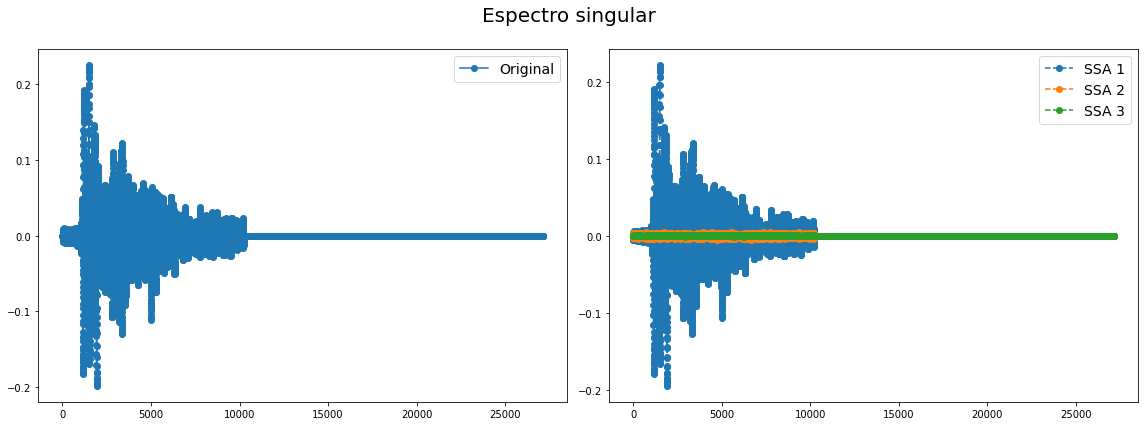

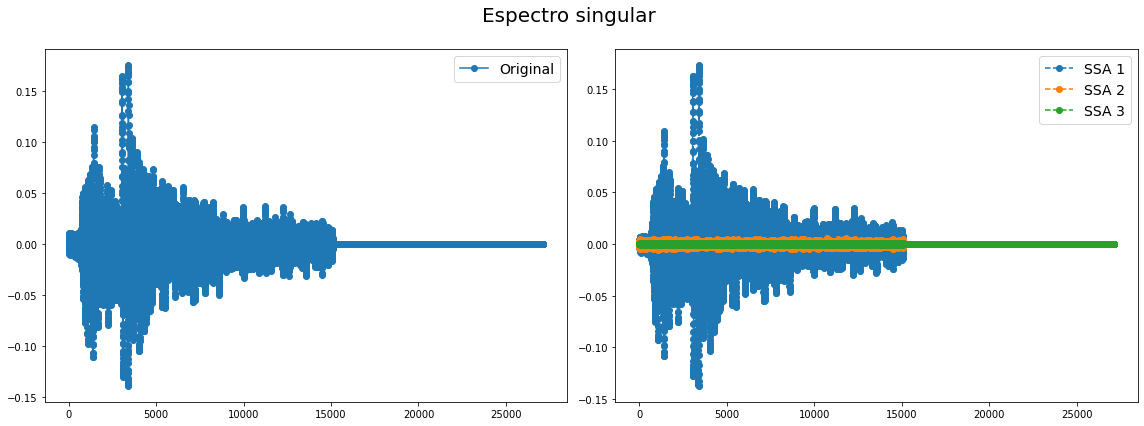

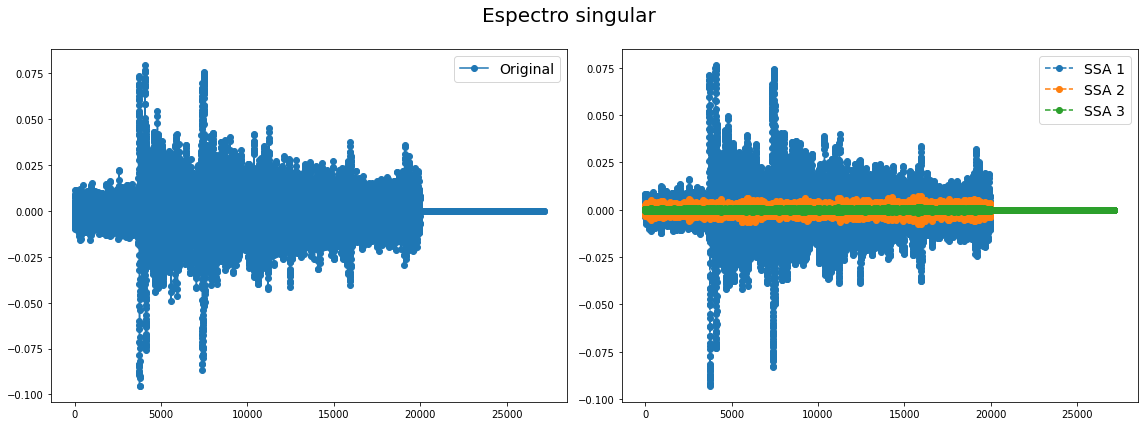

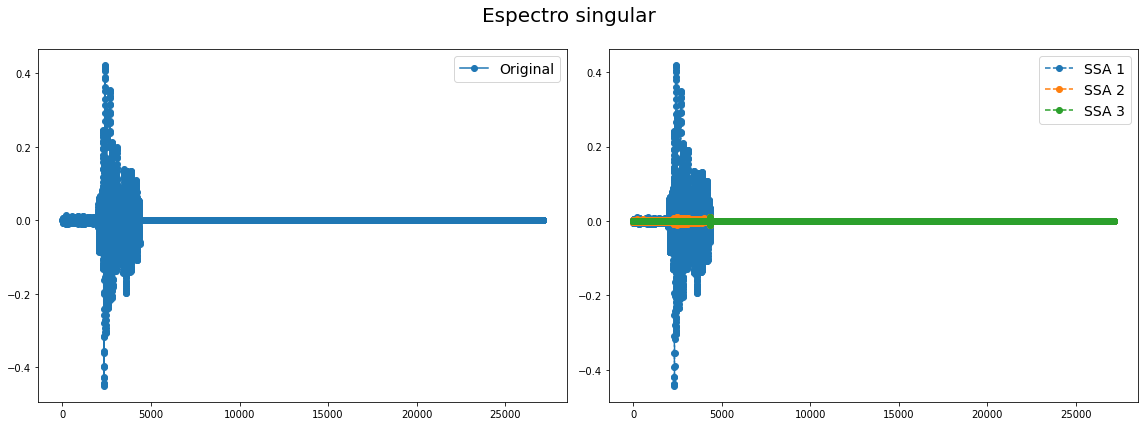

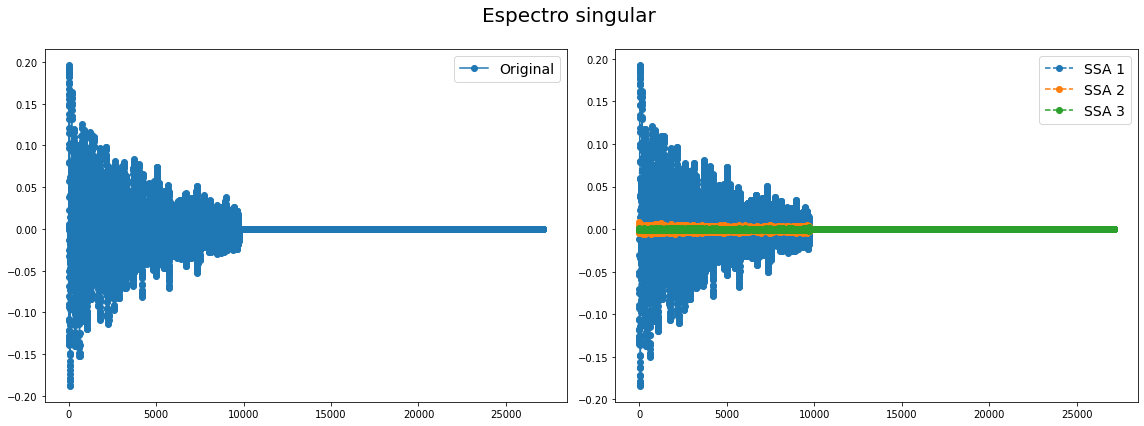

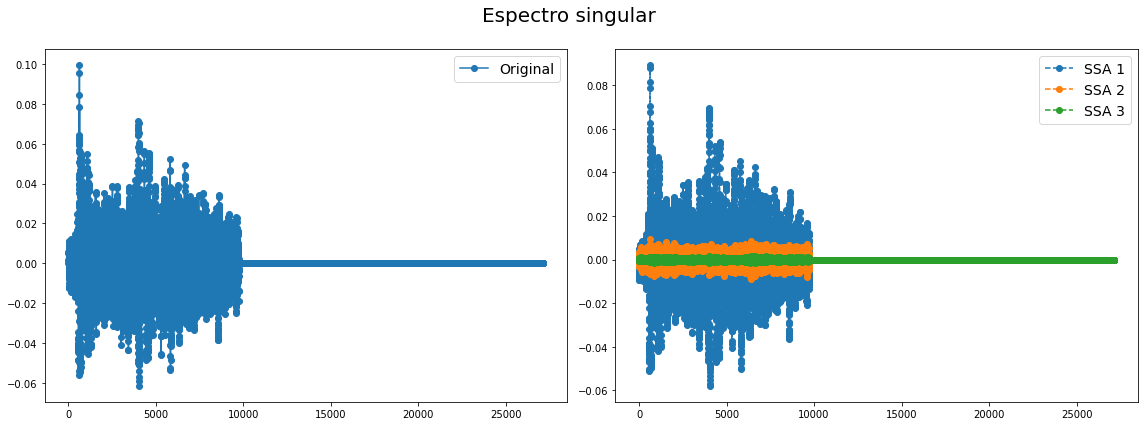

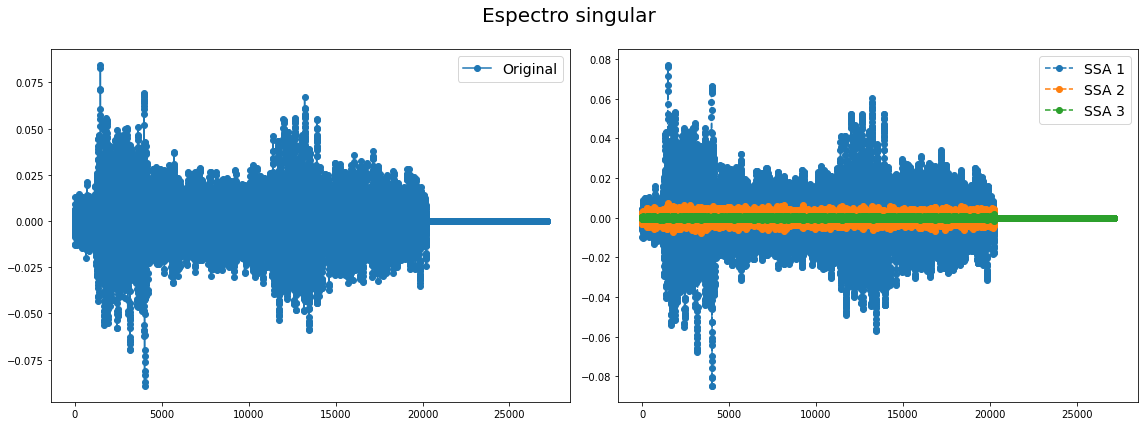

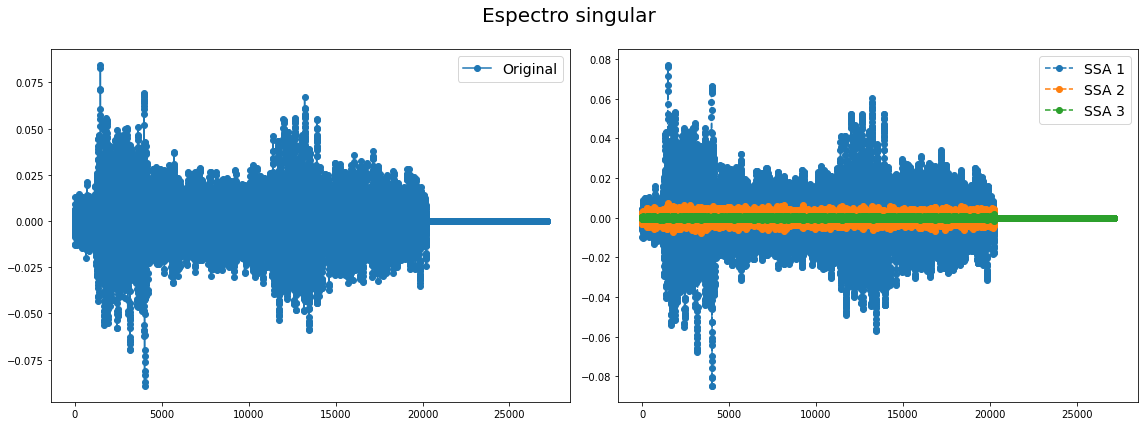

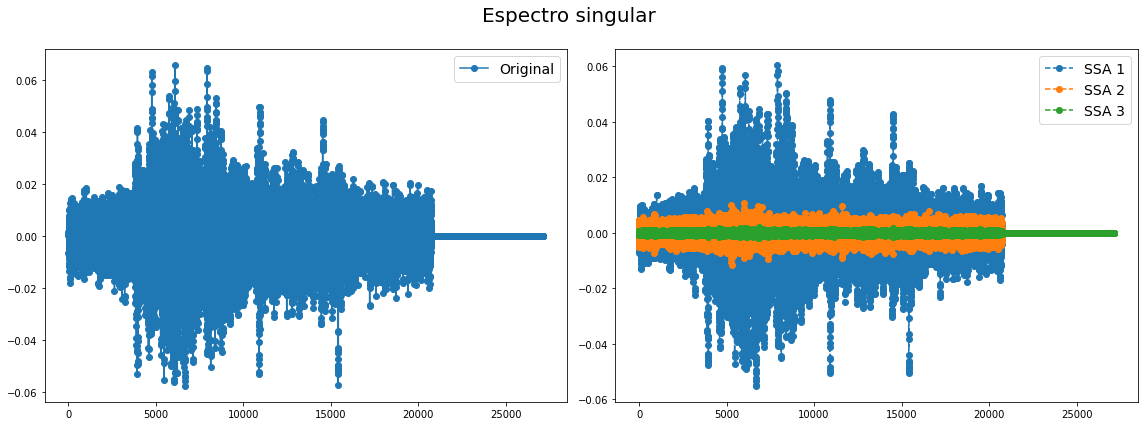

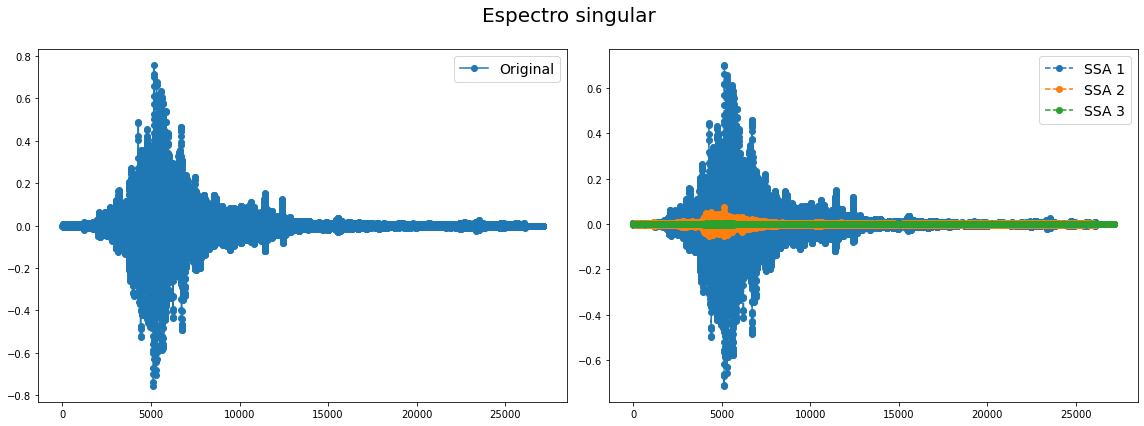

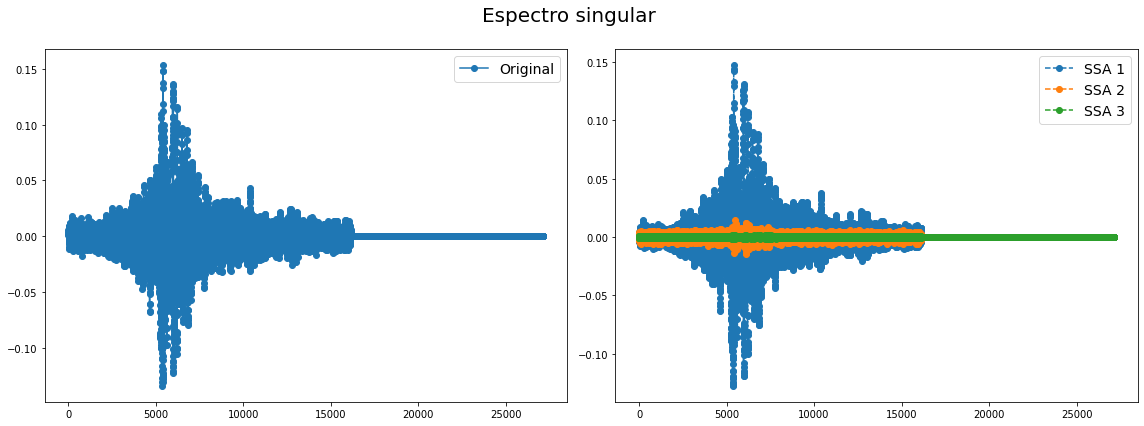

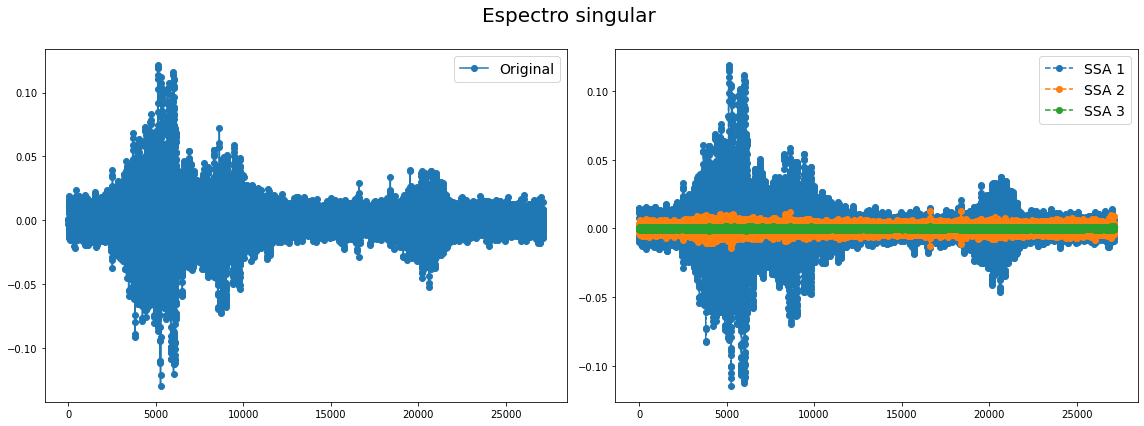

In [12]:
# Show the results for the first time series and its subseries
groups=3
ssaDataLoc=[]
ssaDataReg=[]
ssaDataTele=[]
# for i in range(21):
ssaDataLoc= Analisis_Singular(dataLoc_filter,groups)
ssaDataReg= Analisis_Singular(dataReg_filter,groups)
ssaDataTele= Analisis_Singular(dataTele_filter,groups)
  

for i in range(21):

  # Plot the results for the first time series and its subseries
  plt.figure(figsize=(16, 6))
  ax1 = plt.subplot(121)
  ax1.plot(dataTele_filter[i], 'o-', label='Original')
  ax1.legend(loc='best', fontsize=14)

  ax2 = plt.subplot(122)
  for j in range(3):
      ax2.plot(ssaDataTele[i][j], 'o--', label='SSA {0}'.format(j + 1))
  ax2.legend(loc='best', fontsize=14)

  plt.suptitle('Espectro singular '.format(i+1), fontsize=20)
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.show()

Extracción de caracteristicas de la SSA y sin calcular la STFT.

In [14]:
import scipy 
from scipy.stats import entropy

def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)
  entropyVal = entropy(counter_values, base=None)
  return entropyVal

def calculate_statistics(list_values):
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy] + crossings + statistics

In [15]:
features_ssa = []
for i in range(21):
  for j in range(3):
    aux = np.array(ssaDataLoc[k][j])
    features_ssa.append(np.array(aux))


Transformada corta de Fourier (STFT) y E=extración de caracteristicas.

In [13]:
from os import EX_CANTCREAT
fs = 110
Loc_stft_f = []
Loc_stft_t = []
Loc_stft_Zxx = []

Loc_stft_f2 = []
Loc_stft_t2 = []
Loc_stft_Zxx2 = []

Loc_stft_f3 = []
Loc_stft_t3 = []
Loc_stft_Zxx3 = []

P_max_stft = []
F_max_stft =[]
mean_stft  = []
var_stft = []
max_stft = []
min_stft = []
E_stft = []

for k in range(21):
  for j in range(3):
    f, t, Zxx = signal.stft(ssaDataLoc[k][j], fs, nperseg=512)
    f2, t2, Zxx2 = signal.stft(ssaDataReg[k][j], fs, nperseg=512)
    f3, t3, Zxx3 = signal.stft(ssaDataTele[k][j], fs, nperseg=512)
    Loc_stft_f.append(f)
    Loc_stft_t.append(t)
    Loc_stft_Zxx.append(Zxx)

    Loc_stft_f2.append(f2)
    Loc_stft_t2.append(t2)
    Loc_stft_Zxx2.append(Zxx2)

    Loc_stft_f3.append(f3)
    Loc_stft_t3.append(t3)
    Loc_stft_Zxx3.append(Zxx3)


    E_stft.append(np.sum(np.abs(Zxx)**2, axis=0))  #energia
    absZxx = np.abs(Zxx)
    Pmax_Zxx = np.max(absZxx) # potencia dB
    P_max_stft.append(Pmax_Zxx) # potencia dB
    id = np.where(absZxx==Pmax_Zxx)
    fPmax_Zxx = np.squeeze(f[id[0]])
    F_max_stft.append(fPmax_Zxx) #Fmax
    mean_stft.append(np.mean(absZxx)) 
    var_stft.append(np.var(absZxx))
    max_stft.append(np.max(absZxx))
    min_stft.append(np.min(absZxx))
#print('Pmax at: ',20*np.log10(Pmax_Zxx),' dB\nfPmax: ',fPmax_Zxx)

In [17]:
# mean = np.array(mean).reshape(-1,1)
# var = np.array(var).reshape(-1,1)
# kur = np.array(kur).reshape(-1,1)
# labels = np.array(labels).reshape(-1,1)
# car = np.hstack((mean, var, kur, labels))
# dataframe = pd.DataFrame(car, columns = ['media','varianza', 'kurtosis', 'labels'])

In [18]:
# import seaborn as sns
# sns.pairplot(dataframe, hue='labels', palette='tab10', height=4);

# Hasta aquí he desarrollado el MiniPoryecto, el resto del codigo es el codigo base que nos proporciono el porfesor.

## DataFrames en PANDAS

In [19]:
import pandas as pd

d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
       "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
     }
 

df = pd.DataFrame(d)  

In [20]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [21]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

In [22]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


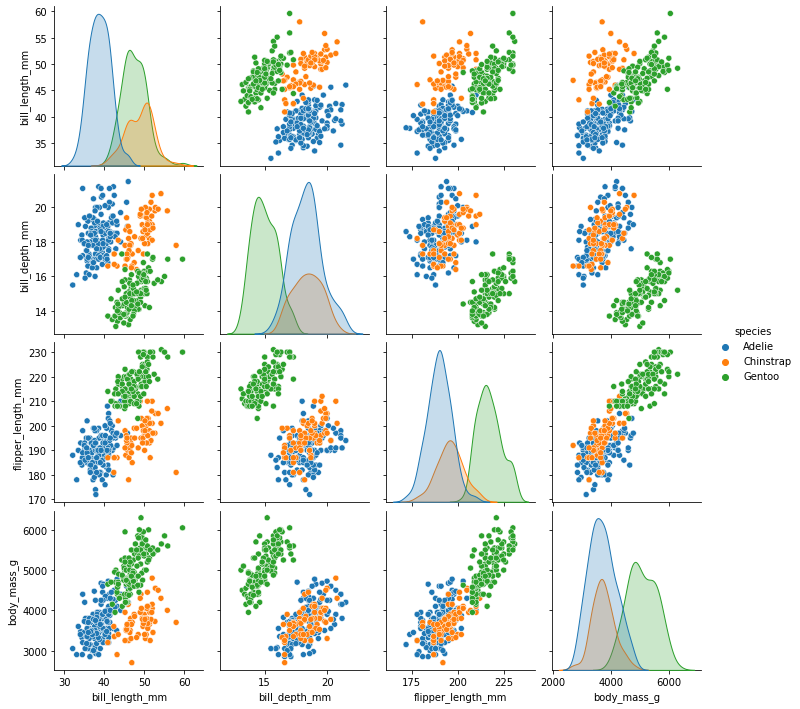

In [23]:
sns.pairplot(penguins, hue="species")

## Numpy Array to DataFrame

In [24]:
import pandas as pd

X = np.random.randn(63,7)
print(X)

[[ 1.23978183e+00 -2.64341065e-01 -2.07465556e+00  1.12255260e+00
  -9.06674719e-02  8.17954167e-01  1.50516089e+00]
 [-3.47470021e-01  9.45486514e-01  7.51927627e-01 -1.96336344e-01
   8.82113929e-01 -1.03163370e-01 -1.61765184e-01]
 [-6.58307494e-02  8.56709236e-01  4.84045051e-02  2.05968454e+00
   5.30888943e-01 -5.40117722e-02  1.01153775e+00]
 [ 1.31849618e+00 -2.61315834e-01  9.57358354e-01  1.37365212e-01
  -6.58591829e-01 -1.09773449e+00 -7.60734342e-01]
 [-4.88507507e-01 -1.05089643e-01 -6.42290897e-01 -8.44967725e-01
  -9.22235947e-01  1.49184695e+00  1.74982824e-01]
 [-6.53547292e-01 -1.01227005e+00  9.08636752e-01  8.32179570e-01
  -3.77666086e-01 -9.72015639e-01  1.78942552e+00]
 [ 1.02440910e+00 -3.80876831e-01 -1.06443493e+00 -8.57723938e-01
   1.19539974e+00  6.71508561e-01 -7.84924158e-01]
 [ 3.02110219e-01 -7.74691142e-01 -1.58272781e+00 -1.33314406e+00
  -4.81825664e-01  6.60683426e-01 -5.16792927e-01]
 [ 4.09703300e-01  1.90941753e-01  5.13625368e-01 -1.30075992e+0

In [25]:
# Dataframe de un nparray
df = pd.DataFrame(X,columns=['Energia','Energia1','F_Pmax1','F_Pmax2','Var','Max','Min'])

In [26]:
df

,Energia,Energia1,F_Pmax1,F_Pmax2,Var,Max,Min
0,1.239782,-0.264341,-2.074656,1.122553,-0.090667,0.817954,1.505161
1,-0.347470,0.945487,0.751928,-0.196336,0.882114,-0.103163,-0.161765
2,-0.065831,0.856709,0.048405,2.059685,0.530889,-0.054012,1.011538
3,1.318496,-0.261316,0.957358,0.137365,-0.658592,-1.097734,-0.760734
4,-0.488508,-0.105090,-0.642291,-0.844968,-0.922236,1.491847,0.174983
...,...,...,...,...,...,...,...
58,0.046846,-1.302807,-2.244221,0.141091,-0.444810,-1.351363,0.166157
59,0.269258,-0.448141,1.576972,-1.249647,1.159917,-0.145767,-0.819240
60,-0.448466,-0.553299,-0.983788,1.151955,0.316993,-1.252120,-0.478117
61,-1.707240,1.079801,0.519091,-0.083942,1.280680,-0.110247,-0.452794


In [27]:
Etiquetas = np.zeros((63,1))
Etiquetas[0:21] = 0
Etiquetas[21:42] = 1
Etiquetas[42:] = 2

print(Etiquetas.shape)

(63, 1)


In [28]:
L1 = 'Local'
L2 = 'Regional'
L3 = 'Telesismo'

vL1 = np.tile(L1,21)
vL2 = np.tile(L2,21)
vL3 = np.tile(L3,21)

EtqString = np.concatenate((vL1,vL2,vL3),axis = 0)

In [31]:
vL1

array(['Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local',
       'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local',
       'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local'],
      dtype='<U5')

In [29]:
df['Etiquetas'] = Etiquetas
df['String'] = EtqString

In [30]:
df

,Energia,Energia1,F_Pmax1,F_Pmax2,Var,Max,Min,Etiquetas,String
0,1.239782,-0.264341,-2.074656,1.122553,-0.090667,0.817954,1.505161,0.0,Local
1,-0.347470,0.945487,0.751928,-0.196336,0.882114,-0.103163,-0.161765,0.0,Local
2,-0.065831,0.856709,0.048405,2.059685,0.530889,-0.054012,1.011538,0.0,Local
3,1.318496,-0.261316,0.957358,0.137365,-0.658592,-1.097734,-0.760734,0.0,Local
4,-0.488508,-0.105090,-0.642291,-0.844968,-0.922236,1.491847,0.174983,0.0,Local
...,...,...,...,...,...,...,...,...,...
58,0.046846,-1.302807,-2.244221,0.141091,-0.444810,-1.351363,0.166157,2.0,Telesismo
59,0.269258,-0.448141,1.576972,-1.249647,1.159917,-0.145767,-0.819240,2.0,Telesismo
60,-0.448466,-0.553299,-0.983788,1.151955,0.316993,-1.252120,-0.478117,2.0,Telesismo
61,-1.707240,1.079801,0.519091,-0.083942,1.280680,-0.110247,-0.452794,2.0,Telesismo


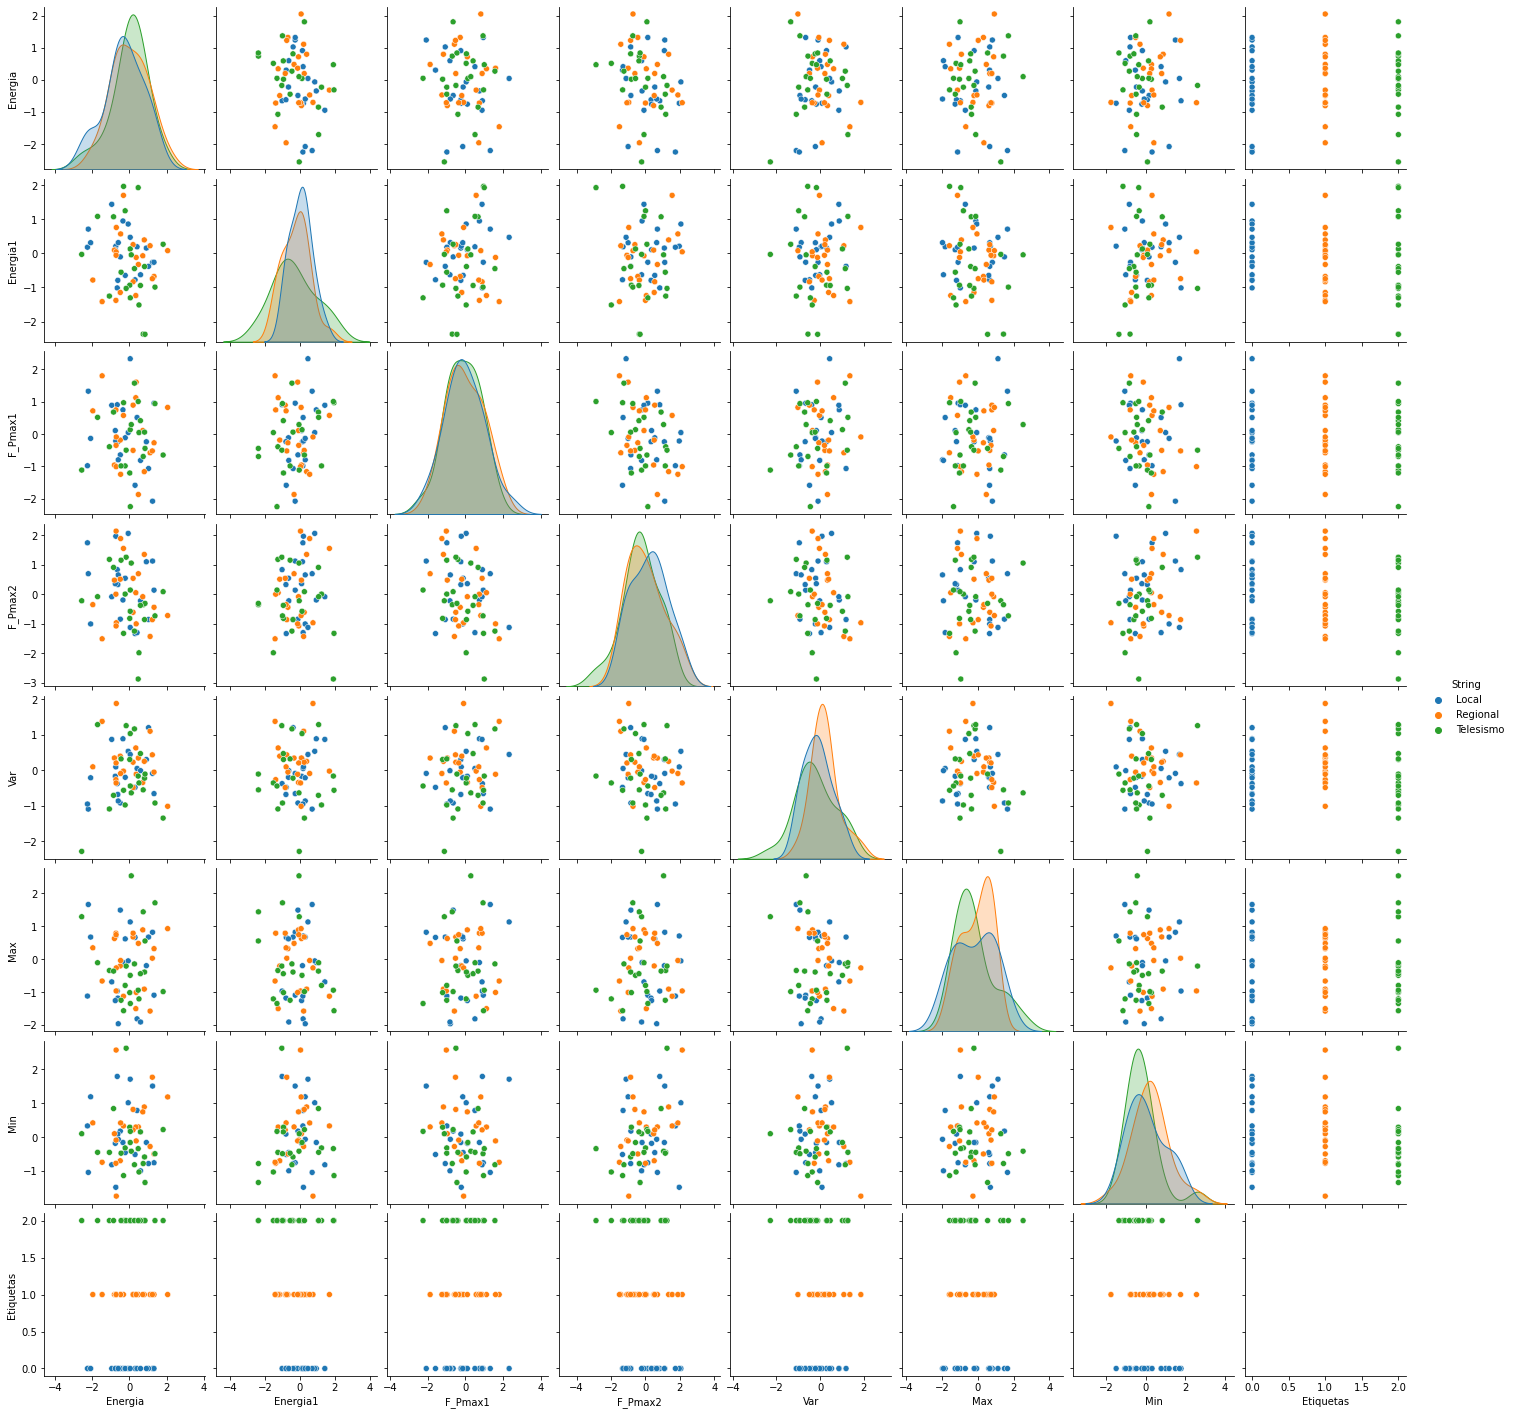

In [32]:
sns.pairplot(df, hue="String")